In [1]:
import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

import os

## Plotting

In terms of population, wow can we understand the relative size of the boroughs of New York? 

In [11]:
borough = pd.read_csv("Population_by_Borough_NYC.csv")

borough.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age Group                       6 non-null      object
 1   Borough                         6 non-null      object
 2   1950                            6 non-null      object
 3   1950 - Boro share of NYC total  6 non-null      object
 4   1960                            6 non-null      object
 5   1960 - Boro share of NYC total  6 non-null      object
 6   1970                            6 non-null      object
 7   1970 - Boro share of NYC total  6 non-null      object
 8   1980                            6 non-null      object
 9   1980 - Boro share of NYC total  6 non-null      object
 10  1990                            6 non-null      object
 11  1990 - Boro share of NYC total  6 non-null      object
 12  2000                            6 non-null      object

In [18]:
borough.head(12)

,Age Group,Borough,1950,1950 - Boro share of NYC total,1960,1960 - Boro share of NYC total,1970,1970 - Boro share of NYC total,1980,1980 - Boro share of NYC total,...,2000,2000 - Boro share of NYC total,2010,2010 - Boro share of NYC total,2020,2020 - Boro share of NYC total,2030,2030 - Boro share of NYC total,2040,2040 - Boro share of NYC total
0,Total Population,NYC Total,"7,891,957",100%,"7,781,984",100%,"7,894,862",100%,"7,071,639",100%,...,"8,008,278",100%,"8,242,624",100%,"8,550,971",100%,"8,821,027",100%,"9,025,145",100%
1,Total Population,Bronx,"1,451,277",18.39%,"1,424,815",18.31%,"1,471,701",18.64%,"1,168,972",16.53%,...,"1,332,650",16.64%,"1,385,108",16.8%,"1,446,788",16.92%,"1,518,998",17.22%,"1,579,245",17.5%
2,Total Population,Brooklyn,"2,738,175",34.7%,"2,627,319",33.76%,"2,602,012",32.96%,"2,230,936",31.55%,...,"2,465,326",30.78%,"2,552,911",30.97%,"2,648,452",30.97%,"2,754,009",31.22%,"2,840,525",31.47%
3,Total Population,Manhattan,"1,960,101",24.84%,"1,698,281",21.82%,"1,539,233",19.5%,"1,428,285",20.2%,...,"1,537,195",19.2%,"1,585,873",19.24%,"1,638,281",19.16%,"1,676,720",19.01%,"1,691,617",18.74%
4,Total Population,Queens,"1,550,849",19.65%,"1,809,578",23.25%,"1,986,473",25.16%,"1,891,325",26.75%,...,"2,229,379",27.84%,"2,250,002",27.3%,"2,330,295",27.25%,"2,373,551",26.91%,"2,412,649",26.73%
5,Total Population,Staten Island,"191,555",2.43%,"221,991",2.85%,"295,443",3.74%,"352,121",4.98%,...,"443,728",5.54%,"468,730",5.69%,"487,155",5.7%,"497,749",5.64%,"501,109",5.55%


Suppose we study the population of each borough. We need to remove commas from the strings before coverting to integers

In [19]:
#years we want
years = [str(year) for year in range(1950,2050,10)]
#the borough column
borough_pop = borough[years + ["Borough"]]
borough_pop = borough_pop.set_index("Borough")

In [20]:
#iterating through every series
#removing commas
#transition string to int with astype
for col in borough_pop.columns:
    borough_pop[col] = borough_pop[col].str.replace(",", "")
    borough_pop[col] = borough_pop[col].astype(int)

We can think of the year as an ordinal variable. The population is the count for the year. We can stratify across New York by the boroughs. 

We should drop the `NYC Total` row. We should **transpose** rows and columns so the index is the year.

In [21]:
borough_pop.drop(index = "NYC Total", inplace = True)
#transposing table
borough_pop = borough_pop.T
borough_pop

Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
1950,1451277,2738175,1960101,1550849,191555
1960,1424815,2627319,1698281,1809578,221991
1970,1471701,2602012,1539233,1986473,295443
1980,1168972,2230936,1428285,1891325,352121
1990,1203789,2300664,1487536,1951598,378977
2000,1332650,2465326,1537195,2229379,443728
2010,1385108,2552911,1585873,2250002,468730
2020,1446788,2648452,1638281,2330295,487155
2030,1518998,2754009,1676720,2373551,497749
2040,1579245,2840525,1691617,2412649,501109


Should we try a stacked bar-chart?

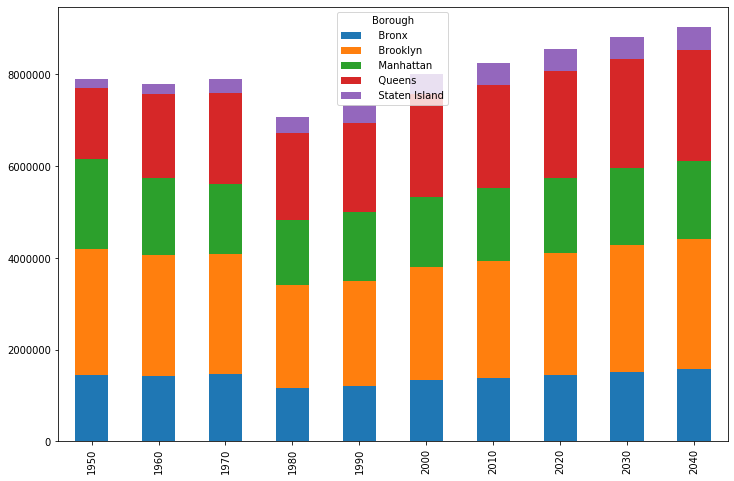

In [22]:
borough_pop.plot(kind='bar', stacked = True);

Note that the T is for transpose. We need to flip rows and columns to have the horizontal axis correspond to years.

Should we try multiple line-charts?

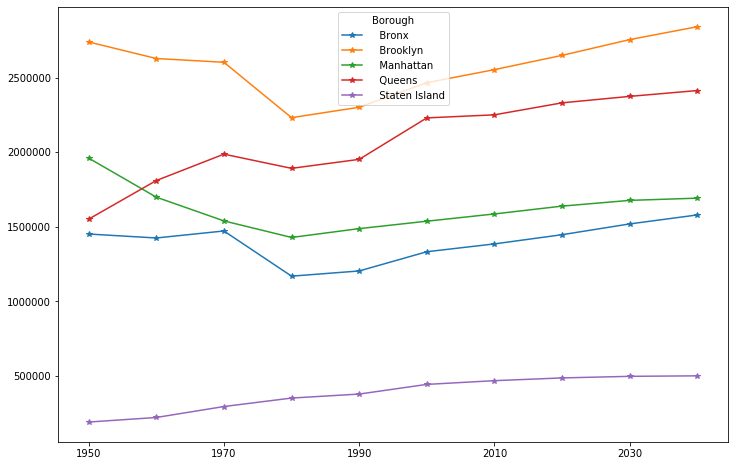

In [24]:
#Adding the asteriks for each year
borough_pop.plot(kind="line", style = "-*");

Considering we are trying to compare the population, it would make sense to use the percentages.

In [25]:
years_percent = [str(year) + " - Boro share of NYC total" for year in range(1950,2050,10)]

borough_percent = borough[years_percent + ["Borough"]]
borough_percent = borough_percent.set_index("Borough")

In [26]:
#replacing % sign
#transfering to float
for col in borough_percent.columns:
    borough_percent[col] = borough_percent[col].str.replace("%", "")
    borough_percent[col] = borough_percent[col].astype(float)

We should rename the columns, drop the `NYC Total` row, and transpose rows and columns

In [27]:
#Dropping total columna and tranposing
borough_percent.columns = years
borough_percent.drop(index = "NYC Total", inplace = True)
borough_percent = borough_percent.T

Should we try a pie chart?

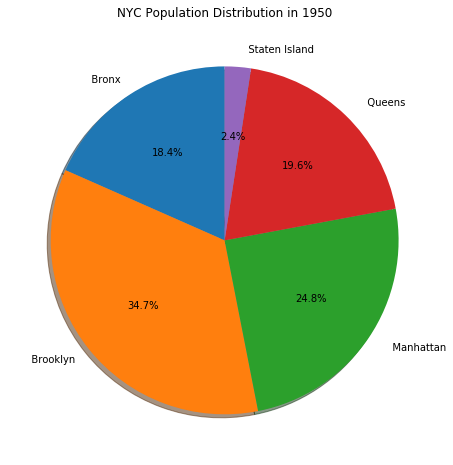

In [28]:
labels = borough_percent.columns.values
sizes = borough_percent.loc["1950",:]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("NYC Population Distribution in 1950");

Should we try multiple line charts?

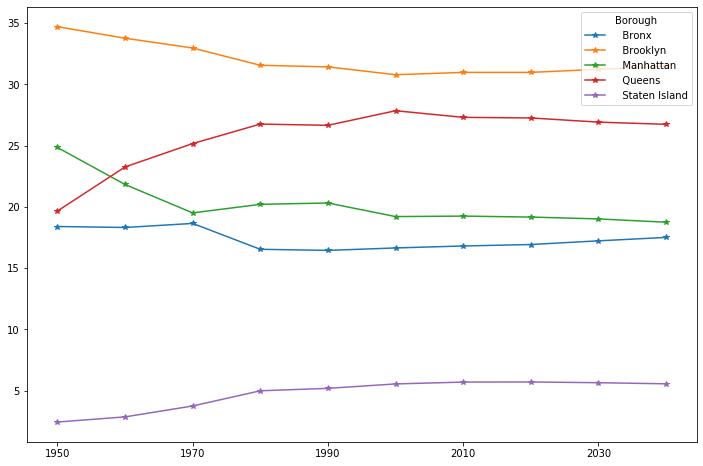

In [29]:
borough_percent.plot(kind="line", style = "-*");

## Processing Strings

In [30]:
county_and_state = pd.read_csv("county_and_state.csv")
county_and_pop = pd.read_csv("county_and_population.csv")    

Suppose we'd like to join these two tables. We can't, because the strings representing the county names don't match, as seen below.

In [31]:
county_and_state

,County,State
0,De Witt County,IL
1,Lac qui Parle County,MN
2,Lewis and Clark County,MT
3,St John the Baptist Parish,LS


In [32]:
county_and_pop

,County,Population
0,DeWitt,16798
1,Lac Qui Parle,8067
2,Lewis & Clark,55716
3,St. John the Baptist,43044


 Before we can join them, we need to standardize them.

Standardize means converting data that has more than one possible representation into a canonical form.

In [33]:
def standardize_county(county_name):
    return (
        county_name
        .lower()               # lower case
        .replace(' ', '')      # remove spaces
        .replace('&', 'and')   # replace &
        .replace('.', '')      # remove dot
        .replace('county', '') # remove county
        .replace('parish', '') # remove parish
    )

In [34]:
county_and_pop['clean_county'] = county_and_pop['County'].map(standardize_county)
county_and_state['clean_county'] = county_and_state['County'].map(standardize_county)

In [35]:
county_and_pop.merge(county_and_state,
                     left_on = 'clean_county', right_on = 'clean_county')

,County_x,Population,clean_county,County_y,State
0,DeWitt,16798,dewitt,De Witt County,IL
1,Lac Qui Parle,8067,lacquiparle,Lac qui Parle County,MN
2,Lewis & Clark,55716,lewisandclark,Lewis and Clark County,MT
3,St. John the Baptist,43044,stjohnthebaptist,St John the Baptist Parish,LS


## Regular Expressions

In [36]:
with open('log.txt', 'r') as f:
    log_lines = f.readlines()

In [37]:
log_lines

['169.237.46.168 - - [26/Jan/2014:10:47:58 -0800] "GET /stat141/Winter04/ HTTP/1.1" 200 2585 "http://anson.ucdavis.edu/courses/"\n',
 '193.205.203.3 - - [2/Feb/2005:17:23:6 -0800] "GET /stat141/Notes/dim.html HTTP/1.0" 404 302 "http://eeyore.ucdavis.edu/stat141/Notes/session.html"\n',
 '169.237.46.240 - "" [3/Feb/2006:10:18:37 -0800] "GET /stat141/homework/Solutions/hw1Sol.pdf HTTP/1.1"\n']

Suppose we want to extract the day, month, year, hour, minutes, seconds, and timezone. 

Looking at the data, we see that these items are not in a fixed position relative to the beginning of the string. That is, slicing by some fixed offset isn't going to work.

In [38]:
log_lines[0][20:31]

'26/Jan/2014'

In [39]:
log_lines[1][20:31]

'/Feb/2005:1'

Instead, we'll need to use some more sophisticated thinking. Let's focus on only the first line of the file.

In [40]:
first = log_lines[0]
first

'169.237.46.168 - - [26/Jan/2014:10:47:58 -0800] "GET /stat141/Winter04/ HTTP/1.1" 200 2585 "http://anson.ucdavis.edu/courses/"\n'

In [41]:
pertinent = first.split("[")[1].split(']')[0]
day, month, rest = pertinent.split('/')
year, hour, minute, rest = rest.split(':')
seconds, time_zone = rest.split(' ')
day, month, year, hour, minute, seconds, time_zone

('26', 'Jan', '2014', '10', '47', '58', '-0800')

A much more sophisticated but common approach is to extract the information we need using a regular expression. 

In [42]:
#re.search
pattern = r'\[(\d+)/(\w+)/(\d+):(\d+):(\d+):(\d+) (.+)\]'
day, month, year, hour, minute, second, time_zone = re.search(pattern, first).groups()
year, month, day, hour, minute, second, time_zone

('2014', 'Jan', '26', '10', '47', '58', '-0800')

Or alternately using the `findall` method:

In [43]:
#re.findall
pattern = r'\[(\d+)/(\w+)/(\d+):(\d+):(\d+):(\d+) (.+)\]'
day, month, year, hour, minute, second, time_zone = re.findall(pattern, first)[0]
year, month, day, hour, minute, second, time_zone

('2014', 'Jan', '26', '10', '47', '58', '-0800')

##### Exercise

Fill in the regex below so that after code executes, day is “26”, month is “Jan”, and year is “2014”. 

In [44]:
log_lines[0]

'169.237.46.168 - - [26/Jan/2014:10:47:58 -0800] "GET /stat141/Winter04/ HTTP/1.1" 200 2585 "http://anson.ucdavis.edu/courses/"\n'

In [48]:
pattern = r""
matches = re.findall(pattern, log_lines[0])
day, month, year = matches[0]
day, month, year

ValueError: not enough values to unpack (expected 3, got 0)

## Restaurant Data

In this example, we will show how regexes can allow us to track quantitative data across categories defined by the appearance of various text fields.

In [50]:
vio = pd.read_csv(os.environ["HOME"] + "/shared/nyc_restaurant_data_random_sample.csv")
#vio = pd.read_csv('nyc_restaurant_data_random_sample.csv')
vio = vio[['CAMIS', 'RECORD DATE', 'VIOLATION DESCRIPTION', "SCORE"]]
desc = vio['VIOLATION DESCRIPTION']

How does the presence of certain keywords can affect quantitative data, e.g. how do restaurant health scores vary as a function of the number of violations that mention "vermin"?

In [51]:
counts = desc.value_counts()

counts[:5]

Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.    2637
Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.                                                                                                                                                 2091
Evidence of mice or live mice present in facility's food and/or non-food areas.                                                                                                                                                                                                    1335
Food not protected from potential source of contamination during storage, preparation, transportation, display or service.                                      

In [52]:
vio['desc'] = (vio['VIOLATION DESCRIPTION']
             .str.replace(r'(\(|\))', '')
             .str.strip()
             .str.lower())
vio.head()

,CAMIS,RECORD DATE,VIOLATION DESCRIPTION,SCORE,desc
0,50018511,11/05/2018,Filth flies or food/refuse/sewage-associated (...,19.0,filth flies or food/refuse/sewage-associated f...
1,50012427,11/05/2018,Non-food contact surface improperly constructe...,19.0,non-food contact surface improperly constructe...
2,50075209,11/05/2018,Personal cleanliness inadequate. Outer garment...,13.0,personal cleanliness inadequate. outer garment...
3,50001110,11/05/2018,Non-food contact surface improperly constructe...,27.0,non-food contact surface improperly constructe...
4,41166868,11/05/2018,"Food contact surface not properly washed, rins...",13.0,"food contact surface not properly washed, rins..."


In [53]:
vio['desc'].value_counts().head() 

non-food contact surface improperly constructed. unacceptable material used. non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.    2637
facility not vermin proof. harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.                                                                                                                                                 2091
evidence of mice or live mice present in facility's food and/or non-food areas.                                                                                                                                                                                                    1335
food not protected from potential source of contamination during storage, preparation, transportation, display or service.                                      

In [54]:
# | pipe corresponds to or
vio["is_clean"] = vio['desc'].str.contains('clean|sanit').fillna(0).astype(int)
vio["is_vermin"] = vio['desc'].str.contains('vermin').fillna(0).astype(int) 
vio["is_surface"] =  vio['desc'].str.contains('wall|ceiling|floor|surface').fillna(0).astype(int)
vio["is_human"] = vio['desc'].str.contains('hand|glove|hair|nail').fillna(0).astype(int)
vio["is_permit"] = vio['desc'].str.contains('permit|certif').fillna(0).astype(int)

In [55]:
vio.head()

,CAMIS,RECORD DATE,VIOLATION DESCRIPTION,SCORE,desc,is_clean,is_vermin,is_surface,is_human,is_permit
0,50018511,11/05/2018,Filth flies or food/refuse/sewage-associated (...,19.0,filth flies or food/refuse/sewage-associated f...,0,0,0,0,0
1,50012427,11/05/2018,Non-food contact surface improperly constructe...,19.0,non-food contact surface improperly constructe...,1,0,1,0,0
2,50075209,11/05/2018,Personal cleanliness inadequate. Outer garment...,13.0,personal cleanliness inadequate. outer garment...,1,0,0,1,0
3,50001110,11/05/2018,Non-food contact surface improperly constructe...,27.0,non-food contact surface improperly constructe...,1,0,1,0,0
4,41166868,11/05/2018,"Food contact surface not properly washed, rins...",13.0,"food contact surface not properly washed, rins...",1,0,1,0,0


In [68]:
count_features = (vio
 .groupby(['CAMIS', 'RECORD DATE'])
 .sum()
 .reset_index()
)

In [69]:
count_features.head()

,CAMIS,RECORD DATE,SCORE,is_clean,is_vermin,is_surface,is_human,is_permit
0,30075445,11/05/2018,5.0,0,0,0,0,0
1,30112340,11/05/2018,60.0,0,0,1,0,0
2,30191841,11/05/2018,12.0,0,0,0,0,0
3,40359480,11/05/2018,7.0,1,0,1,0,0
4,40359705,11/05/2018,32.0,1,0,1,0,0


In [70]:
count_features.iloc[255:260, :]

,CAMIS,RECORD DATE,SCORE,is_clean,is_vermin,is_surface,is_human,is_permit
255,40386793,11/05/2018,43.0,0,1,0,0,0
256,40386837,11/05/2018,4.0,0,0,0,0,0
257,40386976,11/05/2018,17.0,0,0,0,0,0
258,40386999,11/05/2018,8.0,1,0,0,0,0
259,40387162,11/05/2018,7.0,0,0,1,0,0


In [71]:
count_features[count_features['is_vermin'] > 1]

,CAMIS,RECORD DATE,SCORE,is_clean,is_vermin,is_surface,is_human,is_permit
69,40366938,11/05/2018,76.0,0,2,0,0,0
85,40367790,11/05/2018,28.0,0,2,0,0,0
179,40378035,11/05/2018,39.0,0,2,0,0,0
226,40384525,11/05/2018,22.0,0,2,0,0,0
239,40385767,11/05/2018,25.0,0,2,0,0,0
...,...,...,...,...,...,...,...,...
10586,50060478,11/05/2018,25.0,0,2,0,0,0
10587,50060484,11/05/2018,65.0,0,2,0,0,0
11505,50072758,11/05/2018,276.0,0,2,0,0,0
11677,50074588,11/05/2018,66.0,0,2,0,0,0


Use a new pandas feature called `melt`. The granularity of the resulting frame is a violation type in a given inspection

In [75]:
cols = ['CAMIS', 'RECORD DATE', 'is_clean', 'is_vermin', 'is_surface', 'is_human', 'is_permit']

broken_down_by_violation_type = pd.melt(count_features[cols], id_vars=['CAMIS', 'RECORD DATE'],
            var_name='feature', value_name='num_vios')

In [76]:
broken_down_by_violation_type.sort_values(['CAMIS', 'RECORD DATE']).head()

,CAMIS,RECORD DATE,feature,num_vios
0,30075445,11/05/2018,is_clean,0
12161,30075445,11/05/2018,is_vermin,0
24322,30075445,11/05/2018,is_surface,0
36483,30075445,11/05/2018,is_human,0
48644,30075445,11/05/2018,is_permit,0


In [77]:
#read in the scores
ins = vio[["CAMIS", "RECORD DATE", "SCORE"]]
ins.head()

,CAMIS,RECORD DATE,SCORE
0,50018511,11/05/2018,19.0
1,50012427,11/05/2018,19.0
2,50075209,11/05/2018,13.0
3,50001110,11/05/2018,27.0
4,41166868,11/05/2018,13.0


Join scores with the table broken down by violation type

In [78]:
violation_type_and_scores = (
    broken_down_by_violation_type
    .merge(ins, left_on=['CAMIS', 'RECORD DATE'], right_on=['CAMIS', 'RECORD DATE'])
)
violation_type_and_scores.head(12)

,CAMIS,RECORD DATE,feature,num_vios,SCORE
0,30075445,11/05/2018,is_clean,0,5.0
1,30075445,11/05/2018,is_vermin,0,5.0
2,30075445,11/05/2018,is_surface,0,5.0
3,30075445,11/05/2018,is_human,0,5.0
4,30075445,11/05/2018,is_permit,0,5.0
5,30112340,11/05/2018,is_clean,0,12.0
6,30112340,11/05/2018,is_clean,0,48.0
7,30112340,11/05/2018,is_vermin,0,12.0
8,30112340,11/05/2018,is_vermin,0,48.0
9,30112340,11/05/2018,is_surface,1,12.0


In [79]:
violation_type_and_scores.isna().sum()

CAMIS             0
RECORD DATE       0
feature           0
num_vios          0
SCORE          5010
dtype: int64

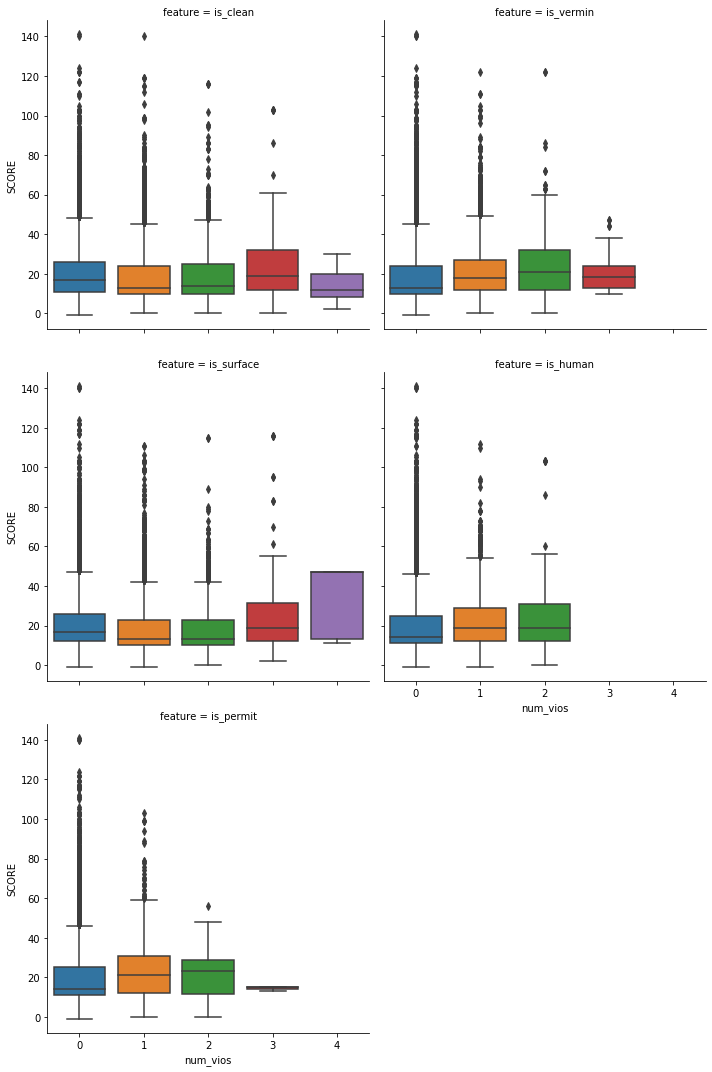

In [80]:
sns.catplot(x='num_vios', y='SCORE',
               col='feature', col_wrap=2,
               kind='box',
               data=violation_type_and_scores);

Above we see, for example, that if a restaurant inspection involved 2 violation with the keyword "vermin", the average score for that inspection would be around 25